# 3D scatter plots in Python demonstration notebooks

My collection demonstrating useful 3D scatter plots, associated visualizations, and interfaces for adjusting the scatter plots implemented in Python/Jupyter.  


-----

Select a notebook from the list below:


### Available Demonstration Notebooks

- [3D scatter plot basics](matplotlib3d-scatter-plots.ipynb) (plus 2D where sense of third variable implied by size of point)
- [3D scatter plots via Plotly](Plotly3d-scatter-plots.ipynb)
- [3D scatter plots customizable via widgets](3D_scatter_adjustableVIAwidgets.ipynb)
- [3D scatter plot using data in a file and Voila interface](3D_scatter_Voila_matplotlibADJUSTABLE.ipynb)
- [streamlined 3D scatter plot in Voila interface](../voila/render/3D_scatter_Voila_matplotlibSTREAMLINED.ipynb)

### Coming soon / available at another link

- ???????

    There is a related notebook available from ????
    
----
    
----    


In [1]:
%pip install mplcursors seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20728 sha256=26da4811d1171bea0ebf77eea4f74ea1dbd63e88cd8f59e1ae716b2a4c8d2bc8
  Stored in directory: /home/jovyan/.cache/pip/wheels/83/43/92/44f9515471f56877c774a515a2902d3e5484ea1bc7fd412d03
Successfully built mplcursors
Note: you may need to restart the kernel to use updated packages.


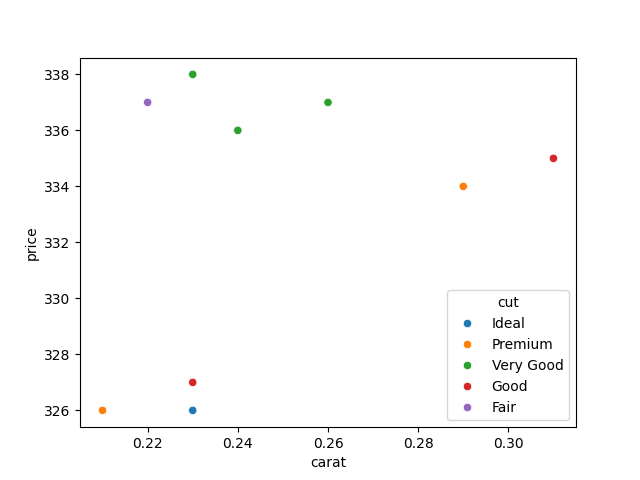

In [1]:
%matplotlib ipympl
# based on https://mplcursors.readthedocs.io/en/stable/examples/dataframe.html
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patheffects import withSimplePatchShadow
import mplcursors

df = sns.load_dataset('diamonds')[:10]
sbsp = sns.scatterplot(x="carat", y="price", hue="cut", data=df)

def show_hover_panel(get_text_func=None):
    cursor = mplcursors.cursor(
        hover=2,  # Transient
        annotation_kwargs=dict(
            bbox=dict(
                boxstyle="square,pad=0.5",
                facecolor="wheat",
                edgecolor="#ddd",
                linewidth=0.5,
                path_effects=[withSimplePatchShadow(offset=(1.5, -1.5))],
            ),
            linespacing=1.5,
            arrowprops=None,
        ),
        highlight=True,
        highlight_kwargs=dict(linewidth=2),
    )
    if get_text_func:
        cursor.connect(
            event="add",
            func=lambda sel: sel.annotation.set_text(get_text_func(sel.index)),
        )
    return cursor

def on_add(index):
    item = df.iloc[index]
    parts = [
        f"Cut: {item.cut}", # f"Cut: {diamonds.loc[idx, 'cut']}\n"
        f"Clarity: {item.clarity}", #  f"Clarity: {diamonds.loc[idx, 'clarity']}\n"
        f"Color: {item.color}", #f"Color: {diamonds.loc[idx, 'color']}"
    ]

    return "\n".join(parts)

sbsp.figure.canvas.header_visible = False # Hide the Figure name at the top of the figure;based on https://matplotlib.org/ipympl/examples/full-example.html
show_hover_panel(on_add)
plt.show();

In [2]:
df = sns.load_dataset('diamonds')[:10]

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


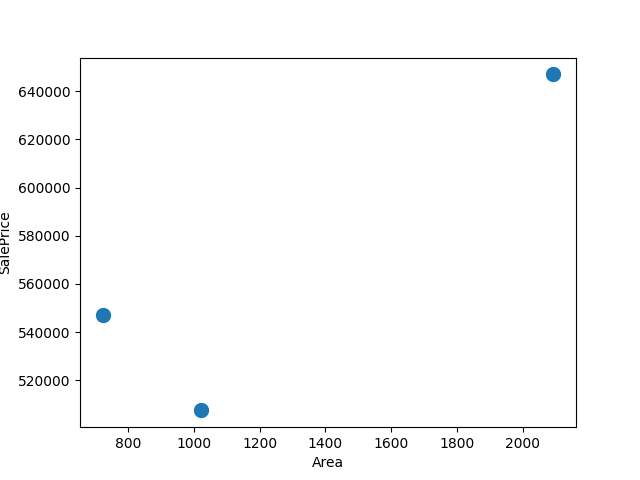

In [2]:
%matplotlib ipympl
from matplotlib import pyplot as plt

from matplotlib.patheffects import withSimplePatchShadow
import mplcursors
from pandas import DataFrame


df = DataFrame(
    dict(
        Suburb=["Ames", "Somerset", "Sawyer"],
        Area=[1023, 2093, 723],
        SalePrice=[507500, 647000, 546999],
    )
)

df.plot.scatter(x="Area", y="SalePrice", s=100)


def show_hover_panel(get_text_func=None):
    cursor = mplcursors.cursor(
        hover=2,  # Transient
        annotation_kwargs=dict(
            bbox=dict(
                boxstyle="square,pad=0.5",
                facecolor="white",
                edgecolor="#ddd",
                linewidth=0.5,
                path_effects=[withSimplePatchShadow(offset=(1.5, -1.5))],
            ),
            linespacing=1.5,
            arrowprops=None,
        ),
        highlight=True,
        highlight_kwargs=dict(linewidth=2),
    )

    if get_text_func:
        cursor.connect(
            event="add",
            func=lambda sel: sel.annotation.set_text(get_text_func(sel.index)),
        )

    return cursor


def on_add(index):
    item = df.iloc[index]
    parts = [
        f"Suburb: {item.Suburb}",
        f"Area: {item.Area:,.0f}m²",
        f"Sale price: ${item.SalePrice:,.0f}",
    ]

    return "\n".join(parts)


show_hover_panel(on_add)

plt.show()

In [4]:
import numpy as np
import pandas as pd
from pandas import DataFrame
df = DataFrame(
    dict(
        Suburb=["Ames", "Somerset", "Sawyer"],
        Area=[1023, "N/A", 723],
        SalePrice=[507500, 647000, 546999],
    )
)
pd.set_option('future.no_silent_downcasting', True)
df = df.replace('N/A',np.NaN).infer_objects(copy=False)
df

,Suburb,Area,SalePrice
0,Ames,1023.0,507500
1,Somerset,NaN,647000
2,Sawyer,723.0,546999


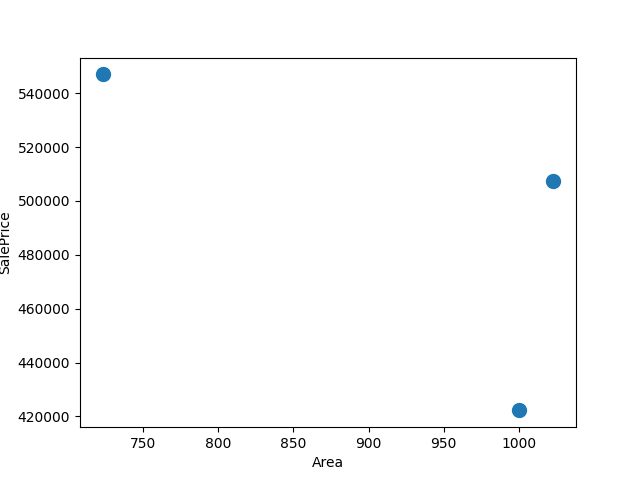

In [1]:
%matplotlib ipympl
from matplotlib import pyplot as plt

from matplotlib.patheffects import withSimplePatchShadow
import mplcursors
from pandas import DataFrame
import pandas as pd
import numpy as np

df = DataFrame(
    dict(
        Suburb=["Ames", "Somerset", "Sawyer", "More"],
        Area=[1023, 2039 , 723,1000],
        SalePrice=[507500, 'N/A', 546999,422222],
    )
)
pd.set_option('future.no_silent_downcasting', True)
df = df.replace('N/A',np.NaN).infer_objects(copy=False)
df.plot.scatter(x="Area", y="SalePrice", s=100)


def show_hover_panel(get_text_func=None):
    cursor = mplcursors.cursor(
        hover=2,  # Transient
        annotation_kwargs=dict(
            bbox=dict(
                boxstyle="square,pad=0.5",
                facecolor="white",
                edgecolor="#ddd",
                linewidth=0.5,
                path_effects=[withSimplePatchShadow(offset=(1.5, -1.5))],
            ),
            linespacing=1.5,
            arrowprops=None,
        ),
        highlight=True,
        highlight_kwargs=dict(linewidth=2),
    )

    if get_text_func:
        cursor.connect(
            event="add",
            func=lambda sel: sel.annotation.set_text(get_text_func(sel.index)),
        )

    return cursor


def on_add(index):
    item = df.iloc[index]
    parts = [
        f"Suburb: {item.Suburb}",
        f"Area: {item.Area:,.0f}m²",
        f"Sale price: ${item.SalePrice:,.0f}",
    ]

    return "\n".join(parts)


show_hover_panel(on_add)

plt.show()

Still seems to work right, despite [this comment](https://stackoverflow.com/questions/75386794/interactive-graphical-visualization-with-matplotlib/75389314?noredirect=1#comment138634052_75389314). Ohhh wait, as the commenter pointed out, that example doesn't use Seaborn, which does some fancier handling to make the stats better.

With the example in THE SO post that uses Seaborn:

In [ ]:
%matplotlib ipympl
# based on https://mplcursors.readthedocs.io/en/stable/examples/dataframe.html
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patheffects import withSimplePatchShadow
import mplcursors

df = sns.load_dataset('diamonds')[:10]
sbsp = sns.scatterplot(x="carat", y="price", hue="cut", data=df)

def show_hover_panel(get_text_func=None):
    cursor = mplcursors.cursor(
        hover=2,  # Transient
        annotation_kwargs=dict(
            bbox=dict(
                boxstyle="square,pad=0.5",
                facecolor="wheat",
                edgecolor="#ddd",
                linewidth=0.5,
                path_effects=[withSimplePatchShadow(offset=(1.5, -1.5))],
            ),
            linespacing=1.5,
            arrowprops=None,
        ),
        highlight=True,
        highlight_kwargs=dict(linewidth=2),
    )
    if get_text_func:
        cursor.connect(
            event="add",
            func=lambda sel: sel.annotation.set_text(get_text_func(sel.index)),
        )
    return cursor

def on_add(index):
    item = df.iloc[index]
    parts = [
        f"Cut: {item.cut}", # f"Cut: {diamonds.loc[idx, 'cut']}\n"
        f"Clarity: {item.clarity}", #  f"Clarity: {diamonds.loc[idx, 'clarity']}\n"
        f"Color: {item.color}", #f"Color: {diamonds.loc[idx, 'color']}"
    ]

    return "\n".join(parts)

sbsp.figure.canvas.header_visible = False # Hide the Figure name at the top of the figure;based on https://matplotlib.org/ipympl/examples/full-example.html
show_hover_panel(on_add)
plt.show();

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patheffects import withSimplePatchShadow
import mplcursors

df = sns.load_dataset('diamonds')[:10]
df[df.carat>0.24] = pd.NA
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.24,Very Good,J,VVS2,62.8,57.0,336.0,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336.0,3.95,3.98,2.47
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.22,Fair,E,VS2,65.1,61.0,337.0,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338.0,4.00,4.05,2.39


### What if some of diamonds `x` values where Nan?

#### Always restart kernel before running next cell. Legend comes out messed up, repeating categorirs, if you don't!

You have to fix things if you `NaN`s before you get to Seaborn. That way correspodence between points and the data in the dataframe is maintained.

`df[["carat","price"]].isnull().values.any()` is True and so the dataframe has NaNs, and special handling will be applied to keep correspondence between points in scattter plot and dataframe.


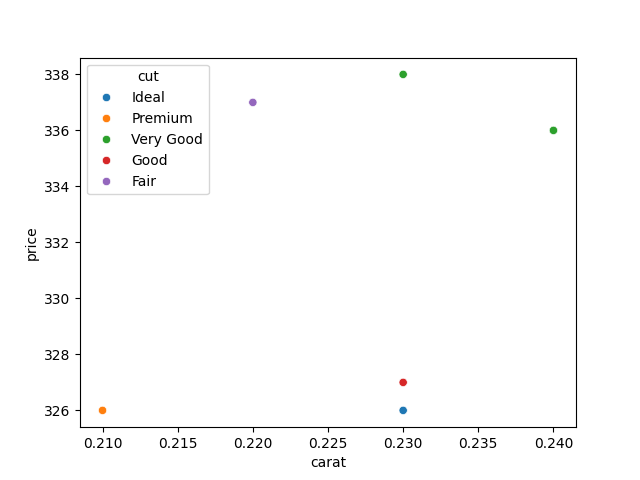

In [1]:
%matplotlib ipympl
# based on https://mplcursors.readthedocs.io/en/stable/examples/dataframe.html
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patheffects import withSimplePatchShadow
import mplcursors

df = sns.load_dataset('diamonds')[:10]
df[df.carat>0.24] = np.NaN
if df[["carat","price"]].isnull().values.any(): #check for NaNs in what will be the X/Y in Scatterplot based on https://stackoverflow.com/a/29530601/8508004
    print(f'`df[["carat","price"]].isnull().values.any()` is {df.isnull().values.any()} and so the dataframe has NaNs, and special handling will be applied to keep correspondence between points in scattter plot and dataframe.')
    df = df.dropna().reset_index(drop=True) # if there are NaNs, remove them and reset the dataframe index so the index can later be used to match up additional details for making annotation you get when hovering
else:
    print(f'`df[["carat","price"]].isnull().values.any()` is {df.isnull().values.any()} and so the dataframe has no NaNs, and so no special is handling necessary to keep correspondence between points in scattter plot and dataframe.')
sbsp = sns.scatterplot(x="carat", y="price", hue="cut", data=df)

def show_hover_panel(get_text_func=None):
    cursor = mplcursors.cursor(
        hover=2,  # Transient
        annotation_kwargs=dict(
            bbox=dict(
                boxstyle="square,pad=0.5",
                facecolor="wheat",
                edgecolor="#ddd",
                linewidth=0.5,
                path_effects=[withSimplePatchShadow(offset=(1.5, -1.5))],
            ),
            linespacing=1.5,
            arrowprops=None,
        ),
        highlight=True,
        highlight_kwargs=dict(linewidth=2),
    )
    if get_text_func:
        cursor.connect(
            event="add",
            func=lambda sel: sel.annotation.set_text(get_text_func(sel.index)),
        )
    return cursor

def on_add(index):
    item = df.iloc[index]
    parts = [
        f"Cut: {item.cut}", # f"Cut: {diamonds.loc[idx, 'cut']}\n"
        f"Clarity: {item.clarity}", #  f"Clarity: {diamonds.loc[idx, 'clarity']}\n"
        f"Color: {item.color}", #f"Color: {diamonds.loc[idx, 'color']}"
    ]

    return "\n".join(parts)

sbsp.figure.canvas.header_visible = False # Hide the Figure name at the top of the figure;based on https://matplotlib.org/ipympl/examples/full-example.html
show_hover_panel(on_add)
plt.show();

Remember, if the legend repeats entries, restart the kernel, and run the code above.

In [2]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.24,Very Good,J,VVS2,62.8,57.0,336.0,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.3,57.0,336.0,3.95,3.98,2.47
5,0.22,Fair,E,VS2,65.1,61.0,337.0,3.87,3.78,2.49
6,0.23,Very Good,H,VS1,59.4,61.0,338.0,4.00,4.05,2.39


In [ ]:
#shorter version without feedback
%matplotlib ipympl
# based on https://mplcursors.readthedocs.io/en/stable/examples/dataframe.html
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patheffects import withSimplePatchShadow
import mplcursors

df = sns.load_dataset('diamonds')[:10]
df[df.carat>0.24] = np.NaN
# this version just does the clean up of any lines with NaNs (on the next line) before passing to Seaborn so no chance of losing correspondence
df = df.dropna().reset_index(drop=True) # if there are NaNs, remove them and reset the dataframe index so the index can later be used to match up additional details for making annotation you get when hovering
sbsp = sns.scatterplot(x="carat", y="price", hue="cut", data=df)

def show_hover_panel(get_text_func=None):
    cursor = mplcursors.cursor(
        hover=2,  # Transient
        annotation_kwargs=dict(
            bbox=dict(
                boxstyle="square,pad=0.5",
                facecolor="wheat",
                edgecolor="#ddd",
                linewidth=0.5,
                path_effects=[withSimplePatchShadow(offset=(1.5, -1.5))],
            ),
            linespacing=1.5,
            arrowprops=None,
        ),
        highlight=True,
        highlight_kwargs=dict(linewidth=2),
    )
    if get_text_func:
        cursor.connect(
            event="add",
            func=lambda sel: sel.annotation.set_text(get_text_func(sel.index)),
        )
    return cursor

def on_add(index):
    item = df.iloc[index]
    parts = [
        f"Cut: {item.cut}", # f"Cut: {diamonds.loc[idx, 'cut']}\n"
        f"Clarity: {item.clarity}", #  f"Clarity: {diamonds.loc[idx, 'clarity']}\n"
        f"Color: {item.color}", #f"Color: {diamonds.loc[idx, 'color']}"
    ]

    return "\n".join(parts)

sbsp.figure.canvas.header_visible = False # Hide the Figure name at the top of the figure;based on https://matplotlib.org/ipympl/examples/full-example.html
show_hover_panel(on_add)
plt.show();

,carat,price
0,0.23,326.0
1,0.21,326.0
2,0.23,327.0
3,0.24,336.0
4,0.24,336.0
5,0.22,337.0
6,0.23,338.0
